We Build a random forest model to predict the number of total affected records using different features as the company, the source of information, the type of attack, the year and the two formula given in the litterature by Olivier Lopez and Jacob.

Here we upload our data
Source : Privacy Rights ClearingHouse

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving m_us_companies_all.csv to m_us_companies_all.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving donneesencoder.csv to donneesencoder.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving PRCBON.csv to PRCBON.csv


We upload our library

In [ ]:
import pandas as pd   # for data manipulation
from sklearn.preprocessing import StandardScaler  # for data standardization
from sklearn.cluster import KMeans # for KMeans clustering
from sklearn.decomposition import PCA # for dimension reduction
import seaborn as sns # data visualization
import matplotlib.pyplot as plt # used for plotting 
import numpy as np # useful for working with arrays
from sklearn.model_selection import train_test_split # for data splitting

In [ ]:
data1 = "m_us_companies_all.csv"
df1 = pd.read_csv(data1, sep= ",")

In [ ]:
df = pd.read_csv("donneesencoder.csv", sep= "\t")

In [ ]:
data = "PRCBON.csv"
df = pd.read_csv("PRCBON.csv", sep= ";")

In [ ]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Company,Date.Made.Public,Total.Records,Type.of.breach,Type.of.organization,Gather.Information.Source,year,Nb_Employees,Amount1,Amount2
0,0,0,bullitt county public schools,2009-10-21,676.0,DISC,EDU,Nonprofit organization,2009,500,3.062958e+05,5.997271e+05
1,1,1,roane state community college,2009-10-21,14783.0,PORT,EDU,Nonprofit organization,2009,2687,3.194487e+06,3.480557e+06
2,2,2,halifax health,2009-10-15,33000.0,PORT,MED,Nonprofit organization,2009,2687,5.881014e+06,5.500942e+06
3,3,3,suffolk community college,2009-10-04,300.0,DISC,EDU,Nonprofit organization,2009,10,1.651938e+05,3.774359e+05
4,4,5,eastern kentucky university,2009-09-23,5045.0,DISC,EDU,Nonprofit organization,2009,200,1.411095e+06,1.885884e+06


In [ ]:
df =df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis =1)

In [ ]:
df.shape

(5155, 10)

In [ ]:
df1.shape

(695, 36)

In [ ]:
df.head(5)

,Company,Date.Made.Public,Total.Records,Type.of.breach,Type.of.organization,Gather.Information.Source,year
0,bullitt county public schools,2009-10-21,676,DISC,EDU,Nonprofit organization,2009
1,roane state community college,2009-10-21,14783,PORT,EDU,Nonprofit organization,2009
2,halifax health,2009-10-15,33000,PORT,MED,Nonprofit organization,2009
3,suffolk community college,2009-10-04,300,DISC,EDU,Nonprofit organization,2009
4,penrose hospital,2009-09-28,175,PHYS,MED,Nonprofit organization,2009


In [ ]:
df1.head(5)

,company_name_id,company_name,url,contact_first_name,contact_last_name,contact_title,contact_email,contact_phone,city,state,country,zip_code,year_founded,full_time_employees,company_type,company_category,revenue_source,business_model,social_impact,description,description_short,financial_info,source_count,data_types,data_comments,example_uses,data_impacts,date_created,last_updated,display,survey_submitted,vetted,vettedByCompany,submitted_through_website,locked,notes,Unnamed: 36
0,1,1,dfd.com,sdf,fd,sd,as@df.com,NaN,NaN,AK,us,10023.0,1092.0,500,Private,Data/Technology,Government contract,Business to Consumer,Public safety,s,s,s,NaN,NaN,NaN,NaN,[],2015-10-20 17:05:06.926540,2015-10-20 17:05:07.282560,False,True,False,True,True,False,NaN,NaN
1,1099is,1099.is,http://1099.is,na,na,NaN,hello@1099.is,NaN,New York,NY,us,NaN,1980.0,NaN,Public,Finance & Investment,"Data analysis for clients, Database licensing",NaN,NaN,Working for yourself has different tax implica...,1099.is helps people navigate the confusing ta...,NaN,1-10,NaN,NaN,NaN,[],2013-12-15 15:28:20.677000,2014-09-11 17:21:28.582504,False,True,False,True,False,False,dropped,NaN
2,1800recyclingcom,1800Recycling.com,http://1800recycling.com,NaN,NaN,NaN,NaN,NaN,Fresno,CA,us,93711.0,NaN,NaN,Public,Environment & Weather,NaN,NaN,NaN,1-800-RECYCLING.com is a dynamic recycling and...,This company is a search engine for recycling ...,NaN,NaN,NaN,NaN,NaN,[],2013-12-15 15:28:20.700000,2014-03-18 21:04:05.465194,False,False,False,False,False,False,NaN,NaN
3,3-round-stones,3 Round Stones,http://3roundstones.com,Bernadette,Hyland,CEO & Founder,bhyland@3roundstones.com,5713313758,Fredericksburg,VA,us,22408.0,2010.0,10,Private,Data/Technology,"Data analysis for clients, Government contract...","Business to Business, Business to Government","Citizen engagement and participation, Consumer...",3 Round Stones licenses a scalable Web develop...,"3 Round Stones helps you produce better data, ...","Privately funded and profitable, 3 Round Stone...",101+,"Agriculture & Food, Business, Consumer, Demogr...",Regional Environmental Protection Agencies and...,3 Round Stones operates the Linked Data Manage...,"[u'Cost efficiency', u'New/improved research',...",2016-01-20 11:33:51.444591,2016-01-20 11:40:56.361494,False,True,False,True,True,False,NaN,NaN
4,3-round-stones-inc,"3 Round Stones, Inc.",http://3RoundStones.com,Bernadette,Hyland,CEO,info@3RoundStones.com,877 290-2127,Washington,DC,us,20004.0,2010.0,10,Private,Data/Technology,"Data analysis for clients, Database licensing,...","Business to Business, Business to Consumer",NaN,3 Round Stones produces a platform for publish...,Our Open Source platform is used by the Fortun...,"3 Round Stones is a profitable, self-funded, w...",NaN,NaN,NaN,NaN,[],2013-12-15 15:27:46.116000,2014-11-12 14:44:25.969871,True,True,True,True,False,True,NaN,NaN


In [ ]:
df["Total.Records"]=pd.to_numeric(df["Total.Records"], errors='coerce')

In [ ]:
df["Nb_Employees"]=0
df["Company_Type"]="Public"

In [ ]:
for i in range(695):
    j=i + 6255
    df['Nb_Employees'][j] = df1['full_time_employees'][i]
    df['Company_Type'][j] = df1['company_type'][i]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df.head()

,Company,Date.Made.Public,Total.Records,Type.of.breach,Type.of.organization,Gather.Information.Source,year,Nb_Employees,Company_Type
0,bullitt county public schools,2009-10-21,676.0,DISC,EDU,Nonprofit organization,2009,500,Private
1,roane state community college,2009-10-21,14783.0,PORT,EDU,Nonprofit organization,2009,NaN,Public
2,halifax health,2009-10-15,33000.0,PORT,MED,Nonprofit organization,2009,NaN,Public
3,suffolk community college,2009-10-04,300.0,DISC,EDU,Nonprofit organization,2009,10,Private
4,penrose hospital,2009-09-28,175.0,PHYS,MED,Nonprofit organization,2009,10,Private


In [ ]:
# Number of missing value of each features
print(df.isnull().sum())

Company                      0
Date.Made.Public             0
Total.Records                0
Type.of.breach               0
Type.of.organization         0
Gather.Information.Source    0
year                         0
Nb_Employees                 0
Company_Type                 0
dtype: int64


In [ ]:

df["Nb_Employees"]=pd.to_numeric(df["Nb_Employees"], errors='coerce')
mode1 = df['Nb_Employees'].mean()
mode1

2687.4069394682256

In [ ]:
# To deal with missing value in the features  with numerical  we remplace the missing value by the median
median = df['Total.Records'].median()
df['Total.Records'].fillna(median, inplace=True)


# Concerning the categorical variable we used the mode 
mode1 = df['Type.of.breach'].mode()
df['Type.of.breach'].fillna("HACK", inplace=True)
#df.loc[df["Type.of.breach"]=="mode1","Type.of.breach"]='HACK'

mode2 = df['Gather.Information.Source'].mode()
df['Gather.Information.Source'].fillna("Nonprofit organization", inplace=True)

df['Company_Type'].fillna("Private", inplace=True)

df['Nb_Employees'].fillna(2687, inplace=True)

In [ ]:
from math import exp, log
n=df.shape[0]
df["Amount1"]=df['Total.Records']
df['Amount2']=df['Total.Records']
for i in range(n):
  df["Amount1"][i]= exp(7.68 + 0.76 * log(df["Total.Records"][i]) )
  df["Amount2"][i]= exp(9.59 + 0.57* log(df["Total.Records"][i]) )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
df.head()

,Company,Date.Made.Public,Total.Records,Type.of.breach,Type.of.organization,Gather.Information.Source,year,Nb_Employees,Company_Type,Amount1,Amount2
0,bullitt county public schools,2009-10-21,676.0,DISC,EDU,Nonprofit organization,2009,500.0,Private,3.062958e+05,5.997271e+05
1,roane state community college,2009-10-21,14783.0,PORT,EDU,Nonprofit organization,2009,2687.0,Public,3.194487e+06,3.480557e+06
2,halifax health,2009-10-15,33000.0,PORT,MED,Nonprofit organization,2009,2687.0,Public,5.881014e+06,5.500942e+06
3,suffolk community college,2009-10-04,300.0,DISC,EDU,Nonprofit organization,2009,10.0,Private,1.651938e+05,3.774359e+05
4,penrose hospital,2009-09-28,175.0,PHYS,MED,Nonprofit organization,2009,10.0,Private,1.096707e+05,2.775976e+05


In [ ]:
df["Amount1"]=pd.to_numeric(df["Amount1"], errors='coerce')
df["Amount2"]=pd.to_numeric(df["Amount2"], errors='coerce')

In [ ]:
df.to_csv('donnees',sep='\t')

In [ ]:
df.head()

,Company,Date.Made.Public,Total.Records,Type.of.breach,Type.of.organization,Gather.Information.Source,year,Nb_Employees,Company_Type,Amount1,Amount2
0,bullitt county public schools,2009-10-21,676.0,DISC,EDU,Nonprofit organization,2009,500.0,Private,3.062958e+05,5.997271e+05
1,roane state community college,2009-10-21,14783.0,PORT,EDU,Nonprofit organization,2009,2687.0,Public,3.194487e+06,3.480557e+06
2,halifax health,2009-10-15,33000.0,PORT,MED,Nonprofit organization,2009,2687.0,Public,5.881014e+06,5.500942e+06
3,suffolk community college,2009-10-04,300.0,DISC,EDU,Nonprofit organization,2009,10.0,Private,1.651938e+05,3.774359e+05
4,penrose hospital,2009-09-28,175.0,PHYS,MED,Nonprofit organization,2009,10.0,Private,1.096707e+05,2.775976e+05


In [ ]:
 df.drop( df[ df['Type.of.breach'] == "PHYS"].index, inplace=True)

In [ ]:
df.shape

(5155, 12)

In [ ]:
df =df.drop(['Company_Type'], axis =1)

In [ ]:
df.to_csv('donnees1',sep='\t')

In [ ]:
df['Nb_Employees'] = df['Nb_Employees'].astype(int)

In [ ]:
byComp = df.groupby('Type.of.breach')
byComp.sum()

,Total.Records,year,Nb_Employees,Amount1,Amount2
Type.of.breach,,,,,
CARD,9.203036e+06,64350,66502,5.139147e+08,2.108125e+08
DISC,4.277582e+08,2935203,4196995,1.650635e+10,6.578437e+09
HACK,5.816416e+09,4491899,5984743,1.075455e+11,2.449867e+10
INSD,6.658245e+07,758184,668272,3.488432e+09,1.569652e+09
PORT,1.096529e+08,1756246,2284895,7.788057e+09,4.465738e+09
STAT,1.623593e+07,369643,877368,1.371838e+09,8.565693e+08


In [ ]:
byComp = df.groupby('Type.of.organization')
byComp.sum()

,Total.Records,year,Nb_Employees,Amount1,Amount2
Type.of.organization,,,,,
BSF,3.947584e+08,790212,824663,1.440964e+10,4.727427e+09
BSO,5.207124e+09,824757,779757,8.289111e+10,1.442170e+10
BSR,4.221738e+08,583366,1121506,1.356667e+10,3.909586e+09
EDU,6.478616e+07,1286138,1679090,3.929904e+09,2.346737e+09
GOV,1.488690e+08,992850,1338130,8.203827e+09,3.733068e+09
MED,1.913110e+08,5004741,6909539,1.276196e+10,8.086181e+09
NGO,8.418344e+06,136713,115133,6.180634e+08,3.383285e+08
Unknown,8.407522e+06,756748,1310957,8.329451e+08,6.168568e+08


In [ ]:
byComp.describe()

Total.Records                ...       Amount2              
                       count          mean  ...           75%           max
Type.of.breach                              ...                            
CARD                    32.0  2.875949e+05  ...  1.035907e+06  1.165709e+08
DISC                  1458.0  2.933870e+05  ...  2.258014e+06  5.704686e+08
HACK                  2230.0  2.608258e+06  ...  3.781742e+06  3.688444e+09
INSD                   377.0  1.766113e+05  ...  1.954617e+06  2.579444e+08
PORT                   874.0  1.254610e+05  ...  3.942988e+06  2.489627e+08
STAT                   184.0  8.823876e+04  ...  3.679847e+06  8.759567e+07

[6 rows x 40 columns]

In [ ]:
byComp2 = df.groupby('Type.of.breach')
byComp2.describe()

Total.Records                ...       Amount2              
                       count          mean  ...           75%           max
Type.of.breach                              ...                            
CARD                    32.0  2.875949e+05  ...  1.035907e+06  1.165709e+08
DISC                  1458.0  2.933870e+05  ...  2.258014e+06  5.704686e+08
HACK                  2230.0  2.608258e+06  ...  3.781742e+06  3.688444e+09
INSD                   377.0  1.766113e+05  ...  1.954617e+06  2.579444e+08
PORT                   874.0  1.254610e+05  ...  3.942988e+06  2.489627e+08
STAT                   184.0  8.823876e+04  ...  3.679847e+06  8.759567e+07

[6 rows x 40 columns]

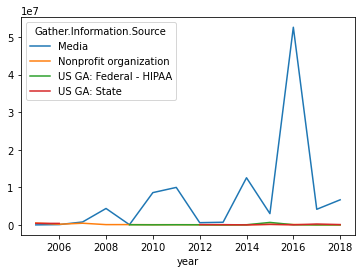

In [ ]:
source = ['Nonprofit organization', 'Media', 'US GA: Federal - HIPAA', 'US GA: State']
df_me = df.loc[df['Gather.Information.Source'].isin(source)]
df_me.groupby(['year', 'Gather.Information.Source'])['Total.Records'].mean().unstack().plot() 

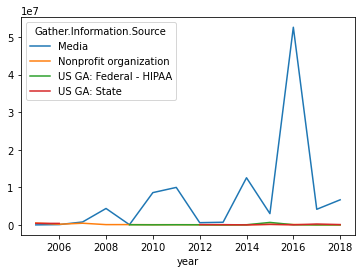

In [ ]:
source = ['Nonprofit organization', 'Media', 'US GA: Federal - HIPAA', 'US GA: State']
df_me = df.loc[df['Gather.Information.Source'].isin(source)]
df_me.groupby(['year', 'Gather.Information.Source'])['Total.Records'].mean().unstack().plot() 

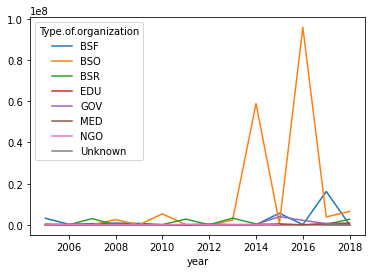

In [ ]:
source = ['BSF', 'BSO', 'BSR', 'EDU', 'GOV', 'MED','NGO', 'Unknown']
df_me1 = df.loc[df['Type.of.organization'].isin(source)]
df_me1.groupby(['year', 'Type.of.organization'])['Total.Records'].mean().unstack().plot() 

array(<matplotlib.axes._subplots.AxesSubplot object at 0x7fa30667d350>,
      dtype=object)

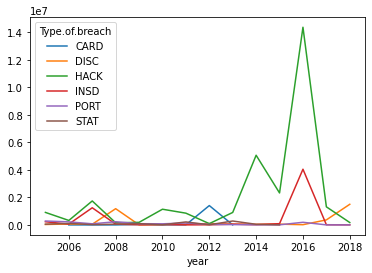

In [ ]:
plt.axis
source = ['CARD', 'DISC', 'HACK', 'INSD', 'PHYS', 'PORT','STAT']
df_me1 = df.loc[df['Type.of.breach'].isin(source)]
np.array(df_me1.groupby(['year', 'Type.of.breach'])['Total.Records'].mean().unstack().plot())

In [ ]:
dfo = df['Company'].unique()

In [ ]:
dfo.shape

(5474,)

In [ ]:
df1=df[df['Gather.Information.Source']=='Nonprofit organization']

In [ ]:
df2=df[df['Gather.Information.Source']=='Media']

In [ ]:
df3=df[df['Gather.Information.Source']=='US GA: Federal - HIPAA']

In [ ]:
df4=df[df['Gather.Information.Source']=='US GA: State']

In [ ]:
df5=df[df['Gather.Information.Source']=='nan']

,Unnamed: 0,Company,Date.Made.Public,Total.Records,Type.of.breach,Type.of.organization,Gather.Information.Source,year


In [ ]:
df1.head()

,Unnamed: 0,Company,Date.Made.Public,Total.Records,Type.of.breach,Type.of.organization,Gather.Information.Source,year
0,1,bullitt county public schools,2009-10-21,676.0,DISC,EDU,Nonprofit organization,2009
1,2,roane state community college,2009-10-21,14783.0,PORT,EDU,Nonprofit organization,2009
2,3,halifax health,2009-10-15,33000.0,PORT,MED,Nonprofit organization,2009
3,4,suffolk community college,2009-10-04,300.0,DISC,EDU,Nonprofit organization,2009
4,5,penrose hospital,2009-09-28,175.0,PHYS,MED,Nonprofit organization,2009


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


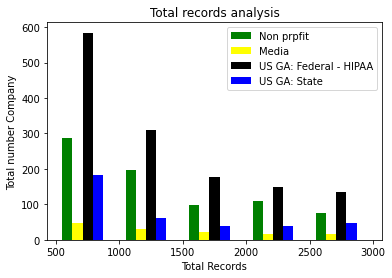

In [ ]:
plt.hist([df1['Total.Records'],df2['Total.Records'],df3['Total.Records'],df4['Total.Records'],df5['Total.Records']], bins = [500,1000,1500,2000, 2500, 3000], 
         color = ['green', 'yellow', 'black','blue','red'], label=["Non prpfit", "Media", "US GA: Federal - HIPAA", "US GA: State" ])
plt.xlabel("Total Records")
plt.ylabel("Total number Company")
plt.title("Total records analysis")
plt.legend()

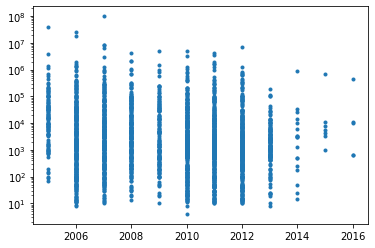

In [ ]:
plt.plot(df1['year'], df1['Total.Records'], marker=".", linestyle="")
plt.yscale("log")

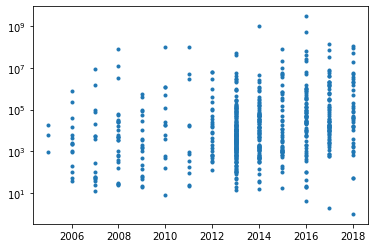

In [ ]:
plt.plot(df2['year'], df2['Total.Records'], marker=".", linestyle="")
plt.yscale("log")

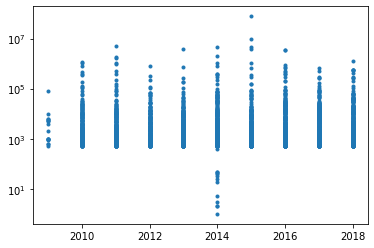

In [ ]:
plt.plot(df3['year'], df3['Total.Records'], marker=".", linestyle="")
plt.yscale("log")

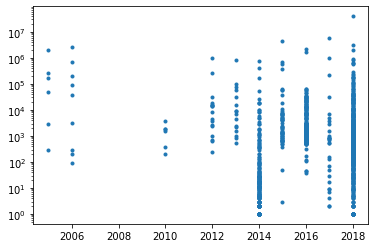

In [ ]:
plt.plot(df4['year'], df4['Total.Records'], marker=".", linestyle="")
plt.yscale("log")

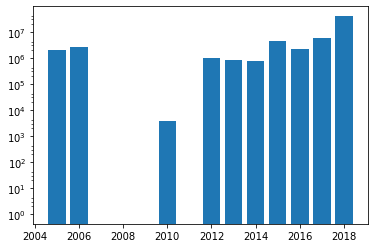

In [ ]:
plt.bar(df4['year'], df4['Total.Records'])
plt.yscale("log", basey=10, subsy=[2,3,4])

In [ ]:
# Nombre total de valeurs manquantes pour chaque caractéristique
print(df.isnull().sum())

Unnamed: 0                     0
Company                        0
Date.Made.Public               0
Total.Records                 35
Type.of.breach               635
Type.of.organization           0
Gather.Information.Source     34
year                           0
dtype: int64


In [ ]:
df.head(5)

,Unnamed: 0,Company,Date.Made.Public,Total.Records,Type.of.breach,Type.of.organization,Gather.Information.Source,year
0,1,bullitt county public schools,2009-10-21,676.0,DISC,EDU,Nonprofit organization,2009
1,2,roane state community college,2009-10-21,14783.0,PORT,EDU,Nonprofit organization,2009
2,3,halifax health,2009-10-15,33000.0,PORT,MED,Nonprofit organization,2009
3,4,suffolk community college,2009-10-04,300.0,DISC,EDU,Nonprofit organization,2009
4,5,penrose hospital,2009-09-28,175.0,PHYS,MED,Nonprofit organization,2009


In [ ]:
# Nombre total de valeurs manquantes pour chaque caractéristique
print(df.isnull().sum())

Company                      0
Date.Made.Public             0
Total.Records                0
Type.of.breach               0
Type.of.organization         0
Gather.Information.Source    0
year                         0
dtype: int64


In [ ]:
categ = ["Type.of.organization", "Type.of.breach", "Gather.Information.Source"]
 # One Hot Encoding conversion
df1 = pd.get_dummies(df, columns=categ)

In [ ]:
df.to_csv('donneesencoder',sep='\t')

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df1.head()

,Unnamed: 0,Unnamed: 0.1,Company,Date.Made.Public,Total.Records,year,Nb_Employees,Amount1,Amount2,Type.of.organization_BSF,Type.of.organization_BSO,Type.of.organization_BSR,Type.of.organization_EDU,Type.of.organization_GOV,Type.of.organization_MED,Type.of.organization_NGO,Type.of.organization_Unknown,Type.of.breach_CARD,Type.of.breach_DISC,Type.of.breach_HACK,Type.of.breach_INSD,Type.of.breach_PORT,Type.of.breach_STAT,Gather.Information.Source_Media,Gather.Information.Source_Nonprofit organization,Gather.Information.Source_US GA: Federal - HIPAA,Gather.Information.Source_US GA: State
0,0,0,bullitt county public schools,2009-10-21,676.0,2009,500,3.062958e+05,5.997271e+05,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,1,1,roane state community college,2009-10-21,14783.0,2009,2687,3.194487e+06,3.480557e+06,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,2,2,halifax health,2009-10-15,33000.0,2009,2687,5.881014e+06,5.500942e+06,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
3,3,3,suffolk community college,2009-10-04,300.0,2009,10,1.651938e+05,3.774359e+05,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,4,5,eastern kentucky university,2009-09-23,5045.0,2009,200,1.411095e+06,1.885884e+06,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [ ]:
df3 = df1.drop(["Unnamed: 0","Unnamed: 0.1","Company", "Date.Made.Public","Nb_Employees", "Amount1", "Amount2"], axis=1)

In [ ]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Company,Date.Made.Public,Total.Records,Type.of.breach,Type.of.organization,Gather.Information.Source,year,Nb_Employees,Amount1,Amount2
0,0,0,bullitt county public schools,2009-10-21,676.0,DISC,EDU,Nonprofit organization,2009,500,3.062958e+05,5.997271e+05
1,1,1,roane state community college,2009-10-21,14783.0,PORT,EDU,Nonprofit organization,2009,2687,3.194487e+06,3.480557e+06
2,2,2,halifax health,2009-10-15,33000.0,PORT,MED,Nonprofit organization,2009,2687,5.881014e+06,5.500942e+06
3,3,3,suffolk community college,2009-10-04,300.0,DISC,EDU,Nonprofit organization,2009,10,1.651938e+05,3.774359e+05
4,4,5,eastern kentucky university,2009-09-23,5045.0,DISC,EDU,Nonprofit organization,2009,200,1.411095e+06,1.885884e+06


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
categ = ["Type.of.organization", "Type.of.breach", "Gather.Information.Source"]
 # One Hot Encoding conversion
df3 = pd.get_dummies(df, columns=categ)

In [ ]:
df3.head()

,Unnamed: 0,Unnamed: 0.1,Company,Date.Made.Public,Total.Records,year,Nb_Employees,Amount1,Amount2,Type.of.organization_BSF,Type.of.organization_BSO,Type.of.organization_BSR,Type.of.organization_EDU,Type.of.organization_GOV,Type.of.organization_MED,Type.of.organization_NGO,Type.of.organization_Unknown,Type.of.breach_CARD,Type.of.breach_DISC,Type.of.breach_HACK,Type.of.breach_INSD,Type.of.breach_PORT,Type.of.breach_STAT,Gather.Information.Source_Media,Gather.Information.Source_Nonprofit organization,Gather.Information.Source_US GA: Federal - HIPAA,Gather.Information.Source_US GA: State
0,0,0,bullitt county public schools,2009-10-21,676.0,2009,500,3.062958e+05,5.997271e+05,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,1,1,roane state community college,2009-10-21,14783.0,2009,2687,3.194487e+06,3.480557e+06,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,2,2,halifax health,2009-10-15,33000.0,2009,2687,5.881014e+06,5.500942e+06,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
3,3,3,suffolk community college,2009-10-04,300.0,2009,10,1.651938e+05,3.774359e+05,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,4,5,eastern kentucky university,2009-09-23,5045.0,2009,200,1.411095e+06,1.885884e+06,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
